SIRにC*betaを毎日与えられるように改造したもの

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

beta_init=0.09 #0.09 #rate of infection
gamma=0.7 #recovery rate

In [0]:
num_of_days=50

day_ranges=[]
betaList=[]
CList=[]

inf=[]
sus=[]
rec=[]

#期間range(start,end)の間のC, betaを設定．何度でも変更できる

#day0-day20: beta=beta_init*100%, C=30
day_ranges.append(range(0,21))#0から数える，endは+1する
b=[beta_init for i in day_ranges[-1]]
betaList.append(b)
#the number of person to meet/contact  
c=[30 for i in day_ranges[-1]]
CList.append(c)

#day21-day50: beta=betainit*70%, C=20
day_ranges.append(range(21,num_of_days+1))#endは+1する
b=[beta_init*0.7 for i in day_ranges[-1]]
betaList.append(b)
c=[20 for i in day_ranges[-1]]
CList.append(c)

def calc(betaLists, CLists):
    S=9273000 # the number of people without immunity
    I=1
    R=0
    alpha=I/(S+I+R)#ある人にあったとき、彼が感染者である確率？

    t=0
    for i, day_range in enumerate(day_ranges):
        CList=CLists[i]
        betaList=betaLists[i]
        r=0
        for j in range(0, i): r+=len(day_ranges[j])-1
        inf_tmp=[]
        sus_tmp=[]
        rec_tmp=[]
        #inf_tmp=[None for x in range(0,r)]
        #sus_tmp=[None for x in range(0,r)]
        #rec_tmp=[None for x in range(0,r)]
        ##print("#len of none:"+str(len(inf_tmp)))
        #print("#"+str(day_range))
        #print("#r:"+str(r))
        for k, beta in enumerate(betaList):
            C=CList[k]
            #print("day",[x for x in day_range][k],beta, C)
            alpha=I/(S+I+R)#infection rate of contact person
            new_R=I*gamma
            new_I=S*C*alpha*beta
            if new_I<0:
                new_I=0
            I=I+new_I-new_R
            R=R+new_R
            S=S-new_I
            if S<=0:
                S=0
            inf_tmp.append(I)
            sus_tmp.append(S)
            rec_tmp.append(R)
            #print("day:"+str(t))
            t+=1
        inf.append(inf_tmp)
        sus.append(sus_tmp)
        rec.append(rec_tmp)
        
      
#実行
calc(betaList, CList)

#plot
#plt.subplot().set_xlim([0, num_of_days])
#print(len(range(0, len(inf[0])+len(inf[1])-1)))
#plt.plot(range(0, len(inf[0])-1), inf[0],label='infection beta='+str(beta_init))
#plt.plot(range(len(inf[0]), len(inf[0])+len(inf[1])-1), inf[1],label='infection beta='+str(beta_init*0.7))

#for line in range(len(inf)):
#  plt.plot(inf[line],label='infection'+str(line))
#  plt.plot(rec[line],label='recover'+str(line))
#  plt.plot(sus[line],label='susceptible'+str(line))
#plt.plot(inf[0]+inf[1],label='infection')
#plt.plot(rec[0]+rec[1],label='recover')
#plt.plot(sus[0]+sus[1],label='susceptible')
#for item in inf: plt.plot(item,label='infection')
#for item in sus: plt.plot(item,label='susceptible')
#for item in rec: plt.plot(item,label='recover')

#plt.legend()

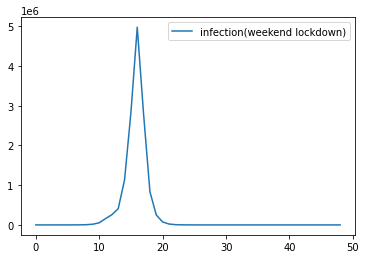

In [9]:
#C, betaの設定．変更のタイミングは揃える必要がある．何度でも変更できる
#さらに別の世界(初期から条件設定が異なる)と比較する場合は下記のように=[]で変数をクリーニングしてからやりなおす
#この同じドキュメント内では上下のプログラムを参照できるのでこのブロックでもplt.plot()やcalc()ができる


day_ranges=[]
betaList=[]
CList=[]
inf=[]
sus=[]
rec=[]

#7 weeks
for week in range(0,7):
  #day0-day4
  day_ranges.append(range(week*7+0,week*7+5))#0から数える，endは+1する
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

  #day 5-day6: 週末C=15
  day_ranges.append(range(week*7+5,week*7+7))#endは+1する
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=[15 for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all=[]
rec_all=[]
sus_all=[]

for i in range(len(inf)):
  inf_all+=inf[i]
  rec_all+=rec[i]
  sus_all+=sus[i]
plt.plot(inf_all,label='infection(weekend lockdown)')
#plt.plot(rec_all,label='recover')
#plt.plot(sus_all,label='susceptible')
plt.legend()

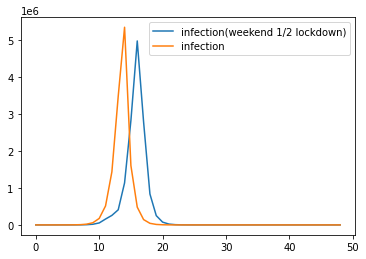

In [10]:
#常にC=30
inf=[]
sus=[]
rec=[]
day_ranges=[]
betaList=[]
CList=[]
for week in range(0,7):
  #day0-day4
  day_ranges.append(range(week*7+0,week*7+7))#0から数える，endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all2=[]
rec_all2=[]
sus_all2=[]

for i in range(len(inf)):
  inf_all2+=inf[i]
  rec_all2+=rec[i]
  sus_all2+=sus[i]
plt.plot(inf_all,label='infection(weekend 1/2 lockdown)')
plt.plot(inf_all2,label='infection')
#plt.plot(rec_all2,label='recover')
#plt.plot(sus_all2,label='susceptible')
plt.legend()

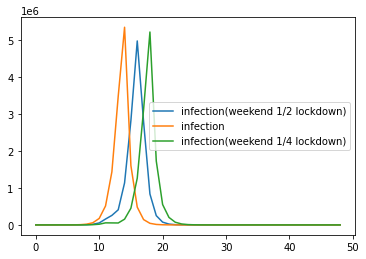

In [5]:
# 週末C=2
inf=[]
sus=[]
rec=[]
day_ranges=[]
betaList=[]
CList=[]
for week in range(0,7):
  #day0-day4: weekday
  day_ranges.append(range(week*7+0,week*7+5))#0から数える，endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

  #day 5-day6: weekend:
  day_ranges.append(range(week*7+5,week*7+7))#endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[7.5 for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all3=[]
rec_all3=[]
sus_all3=[]

for i in range(len(inf)):
  inf_all3+=inf[i]
  rec_all3+=rec[i]
  sus_all3+=sus[i]

plt.plot(inf_all,label='infection(weekend 1/2 lockdown)')
plt.plot(inf_all2,label='infection')
plt.plot(inf_all3,label='infection(weekend 1/4 lockdown)')
#plt.plot(rec_all2,label='recover')
#plt.plot(sus_all2,label='susceptible')
plt.legend()

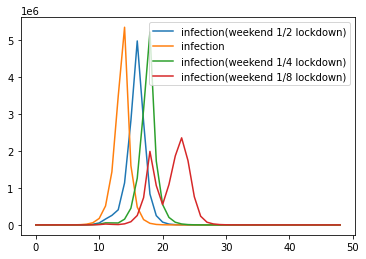

In [6]:
# 週末C=3.75
inf=[]
sus=[]
rec=[]
day_ranges=[]
betaList=[]
CList=[]
for week in range(0,7):
  #day0-day4: weekday
  day_ranges.append(range(week*7+0,week*7+5))#0から数える，endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

  #day 5-day6: weekend: 変化なし
  day_ranges.append(range(week*7+5,week*7+7))#endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[3.75 for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all4=[]
rec_all4=[]
sus_all4=[]

for i in range(len(inf)):
  inf_all4+=inf[i]
  rec_all4+=rec[i]
  sus_all4+=sus[i]

plt.plot(inf_all,label='infection(weekend 1/2 lockdown)')
plt.plot(inf_all2,label='infection')
plt.plot(inf_all3,label='infection(weekend 1/4 lockdown)')
plt.plot(inf_all4,label='infection(weekend 1/8 lockdown)')
#plt.plot(rec_all2,label='recover')
#plt.plot(sus_all2,label='susceptible')
plt.legend()

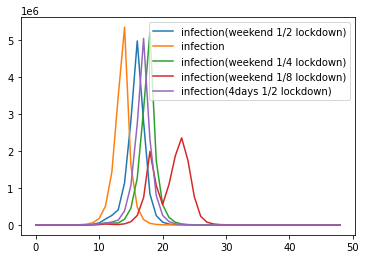

In [7]:
# 週末C=3.75
inf=[]
sus=[]
rec=[]
day_ranges=[]
betaList=[]
CList=[]
for week in range(0,7):
  #day0-day4: weekday
  day_ranges.append(range(week*7+0,week*7+4))#0から数える，endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

  #day 5-day6: weekend: 変化なし
  day_ranges.append(range(week*7+4,week*7+7))#endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[15 for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all5=[]
rec_all5=[]
sus_all5=[]

for i in range(len(inf)):
  inf_all5+=inf[i]
  rec_all5+=rec[i]
  sus_all5+=sus[i]

plt.plot(inf_all,label='infection(weekend 1/2 lockdown)')
plt.plot(inf_all2,label='infection')
plt.plot(inf_all3,label='infection(weekend 1/4 lockdown)')
plt.plot(inf_all4,label='infection(weekend 1/8 lockdown)')
plt.plot(inf_all5,label='infection(4days 1/2 lockdown)')
#plt.plot(rec_all2,label='recover')
#plt.plot(sus_all2,label='susceptible')
plt.legend()